In [60]:
# Import modules
import pandas as pd
from pathlib import Path
from scipy.stats import f_oneway

In [61]:
# Load the CSV file
csv_file = Path("Dataset/salaries.csv")
salaries_df = pd.read_csv(csv_file)

# Display sample data
salaries_df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EN,FT,Data Analyst,75000,USD,75000,US,100,US,M
1,2023,EN,FT,Data Analyst,60000,USD,60000,US,100,US,M
2,2023,MI,FT,Analytics Engineer,185700,USD,185700,US,0,US,M
3,2023,MI,FT,Analytics Engineer,165000,USD,165000,US,0,US,M
4,2023,SE,FT,Data Engineer,160000,USD,160000,US,100,US,M


In [62]:
# Check for missing data
salaries_df.count()

work_year             3006
experience_level      3006
employment_type       3006
job_title             3006
salary                3006
salary_currency       3006
salary_in_usd         3006
employee_residence    3006
remote_ratio          3006
company_location      3006
company_size          3006
dtype: int64

In [63]:
# Identify type of data
salaries_df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [64]:
# Select companies locate in US
us_df = salaries_df.loc[salaries_df["company_location"]=="US",:]
us_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EN,FT,Data Analyst,75000,USD,75000,US,100,US,M
1,2023,EN,FT,Data Analyst,60000,USD,60000,US,100,US,M
2,2023,MI,FT,Analytics Engineer,185700,USD,185700,US,0,US,M
3,2023,MI,FT,Analytics Engineer,165000,USD,165000,US,0,US,M
4,2023,SE,FT,Data Engineer,160000,USD,160000,US,100,US,M


In [125]:
salaries_df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3006.000000,3.006000e+03,3006.000000,3006.000000
mean,2022.220892,1.977000e+05,134282.715569,49.118430
std,0.689191,7.474090e+05,62764.987716,48.488515
min,2020.000000,5.000000e+03,5000.000000,0.000000
25%,2022.000000,9.500000e+04,91427.750000,0.000000
50%,2022.000000,1.350000e+05,130000.000000,50.000000
75%,2023.000000,1.799938e+05,172339.500000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


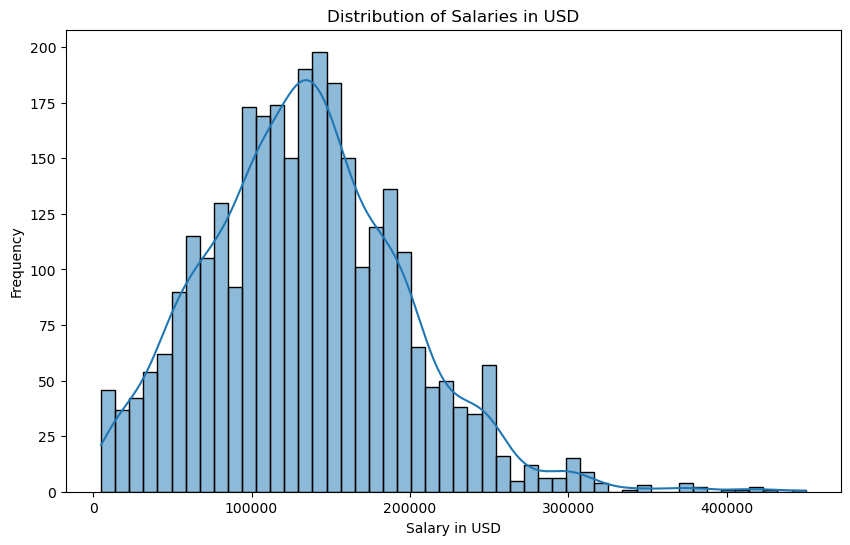

In [108]:
import seaborn as sns
#  visualization of the distribution of salaries in USD

plt.figure(figsize=(10,6))
sns.histplot(salaries_df['salary_in_usd'], bins=50, kde=True)
plt.title('Distribution of Salaries in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

In [ ]:
'''t-test to compare the mean salaries of two different groups. I compared the mean salaries of 'Data Analysts' and 'Analytics Engineers' to see if there is
a significant difference.'''

In [127]:
from scipy import stats
# Filter the dataframe for 'Data Analyst' and 'Analytics Engineer' job titles
analyst_salaries = salaries_df[salaries_df['job_title'] == 'Data Analyst']['salary_in_usd']
engineer_salaries = salaries_df[salaries_df['job_title'] == 'Analytics Engineer']['salary_in_usd']

# Perform a t-test
t_stat, p_value = stats.ttest_ind(analyst_salaries, engineer_salaries, equal_var=False, nan_policy='omit')

# Print the results
print('T-statistic:', t_stat)
print('P-value:', p_value)

T-statistic: -5.772061684855147
P-value: 1.0784376329269522e-07


In [ ]:
# The p-value is less than 0.05, suggesting that there is a significant difference in the mean salaries of 'Data Analysts' and 'Analytics Engineers'.

In [ ]:
# main points for presentation
'''The dataset contains 3006 entries. The average salary in USD is approximately 134,283, with a standard deviation of around 63,000. This indicates a significant variation in salaries. 
The minimum salary is 5,000 USD, and the maximum is 450,000 USD.'''

In [65]:
# How does employment type affect salary
# Group By Employment Type
grouped = salaries_df.groupby('employment_type')['salary_in_usd'].mean()
print(grouped)

employment_type
CT    134871.125000
FL     52008.666667
FT    135072.243607
PT     39534.588235
Name: salary_in_usd, dtype: float64


In [66]:
# It appers that the employment type does have an effect on salary(expound on this in presentation)
'''Full time workers and contractors make the most(in excess of $130k, followed by part time workers, freelance workers make the least'''

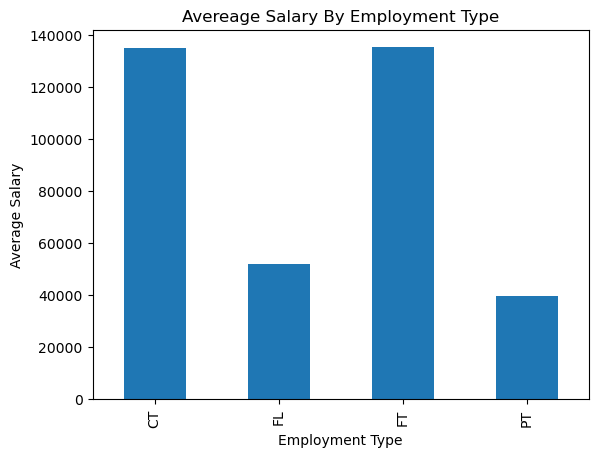

In [67]:
# Visualisation of variation in compensation by employment type
grouped.plot(kind='bar')
plt.title('Avereage Salary By Employment Type')
plt.ylabel('Average Salary')
plt.xlabel('Employment Type')
plt.show()

In [ ]:
# the average salary varies significantly depending on the employment type.

In [ ]:
'''further analysis on impact of employment type on salary, we can look at the distribution of salaries within each employment type. This gives a better understanding of the salary range and any potential 
outliers within each group.'''

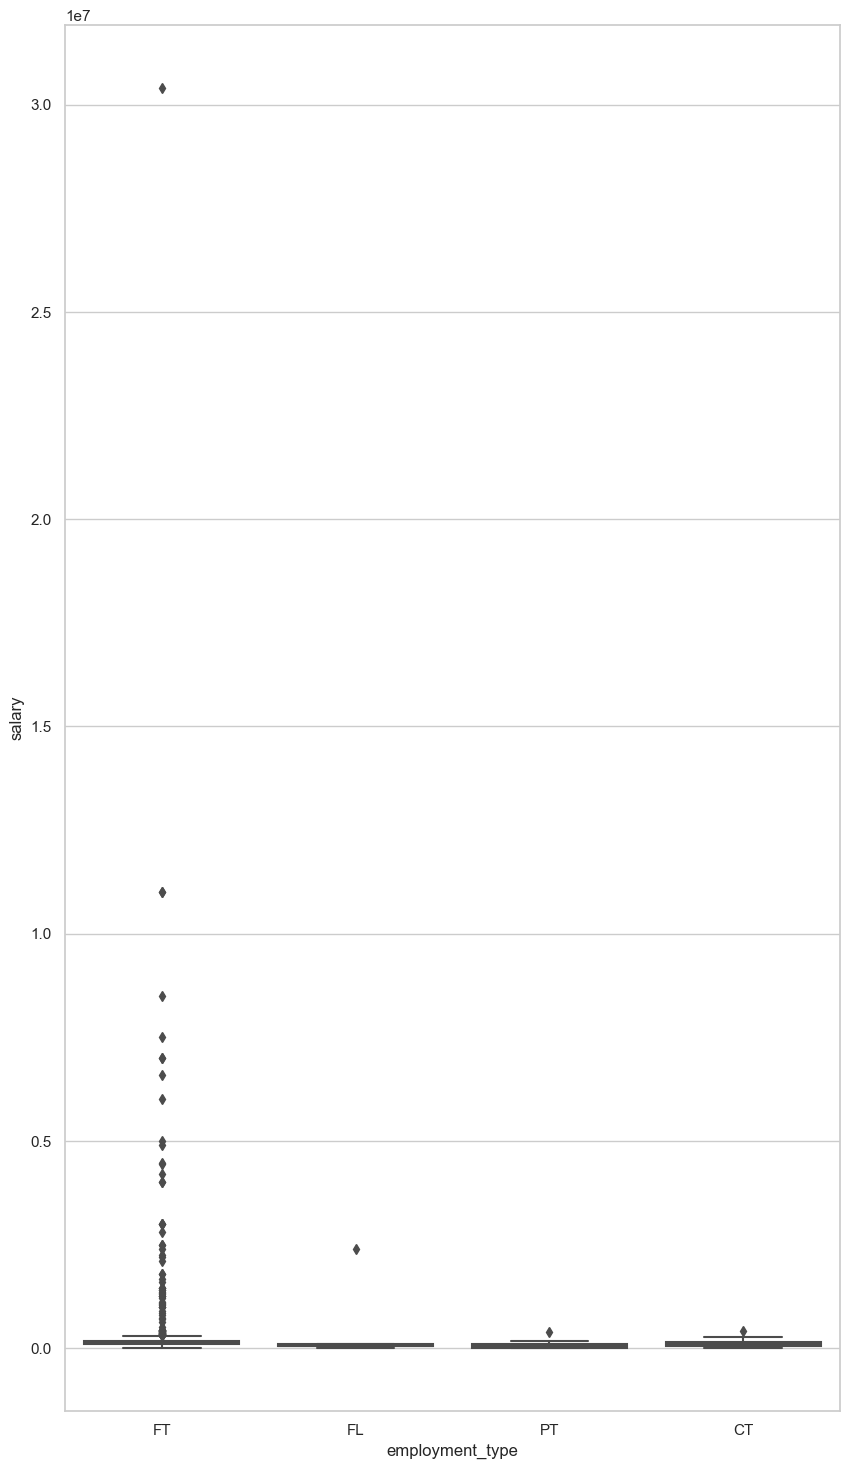

In [120]:
# boxplot showing the distribution of salaries within each employment type
# Set the style of the visualization
sns.set(style='whitegrid')

# Create a boxplot to show the distribution of salaries within each employment type
plt.figure(figsize=(10, 18))
sns.boxplot(x='employment_type', y='salary', data=salaries_df)

# Display the plot
plt.show()

In [ ]:
'''This plot provides a visual representation of the range and distribution of salaries for each employment type. The line in the middle of each box represents the median salary(Not really visible,
I assume it has something to do with the distribution), while the box itselfrepresents the interquartile range (the middle 50% of salaries). The whiskers represent the range of the data within 1.5 
times the interquartile range, and any points beyond that are considered outliers. The largest variation can be seen in full time workers and freelance workers'''

In [68]:
full_time_salaries = salaries_df[salaries_df['employment_type'] == 'FT']['salary_in_usd']
part_time_salaries = salaries_df[salaries_df['employment_type'] == 'PT']['salary_in_usd']
contract_salaries = salaries_df[salaries_df['employment_type'] == 'CT']['salary_in_usd']
freelance_salaries = salaries_df[salaries_df['employment_type'] == 'FL']['salary_in_usd']
# Missing line for "Freelance"(confer with group on Monday)

# Perform the ANOVA test
f_statistics, p_value = f_oneway(full_time_salaries, part_time_salaries, contract_salaries)
print(f"F-statistics: {f_statistics}")
print(f"P-value: {p_value}")


F-statistics: 19.88531401360433
P-value: 2.634955997528529e-09


In [106]:
grouped = salaries_df.groupby('experience_level')['salary_in_usd'].mean()
grouped.head()



experience_level
EN     73277.445312
EX    196597.361446
MI    102429.541973
SE    150416.286217
Name: salary_in_usd, dtype: float64

In [113]:
'''Next, I will analyze the impact of experience level on salary. This could provide insights into how much experience contributes to the salary of an employee.
we have group the data by experience level and calculate the average salary for each group. We determine the average salary for entry-level (EN), mid-level (MI),
senior-level (SE), and executive-level (EX) employees. It appears that the average salary increases with the level of experience.

The table above shows the average salary in USD for each experience level.
Entry-level (EN) employees earn an average salary of approximately $73,277.
Mid-level (MI) employees earn an average salary of approximately $196,597.
Senior-level (SE) employees earn an average salary of approximately $150,416.
Executive-level (EX) employees earn an average salary of approximately $102,430.
This indicates that the level of experience does have a significant impact on salary, with mid-level employees earning the highest average salary in this datas'''

'Next, I will analyze the impact of experience level on salary. This could provide insights into how much experience contributes to the salary of an employee.\nwe have group the data by experience level and calculate the average salary for each group. We determine the average salary for entry-level (EN), mid-level (MI),\nsenior-level (SE), and executive-level (EX) employees. It appears that the average salary increases with the level of experience.\n\nThe table above shows the average salary in USD for each experience level.\nEntry-level (EN) employees earn an average salary of approximately $73,277.\nMid-level (MI) employees earn an average salary of approximately $196,597.\nSenior-level (SE) employees earn an average salary of approximately $150,416.\nExecutive-level (EX) employees earn an average salary of approximately $102,430.\nThis indicates that the level of experience does have a significant impact on salary, with mid-level employees earning the highest average salary in this 

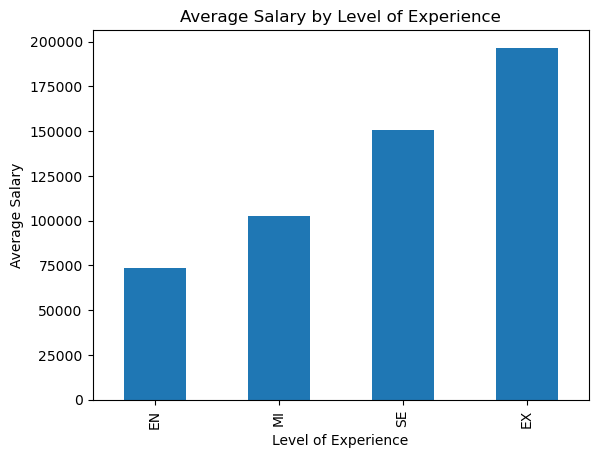

In [71]:
# We can graphically represents the average salary for each experience level, providing a visual understanding of how the level of experience affects salary.
import matplotlib.pyplot as plt

grouped.sort_values().plot(kind='bar')
plt.title('Average Salary by Level of Experience')
plt.ylabel('Average Salary')
plt.xlabel('Level of Experience')
plt.show()

In [72]:
from scipy.stats import f_oneway

# experience levels are 'Entry_level(EN)', 'Mid-level(MI)', 'Senior-level(SE)','Executive level'(EX).
entry_level_salaries = salaries_df[salaries_df['experience_level'] == 'EN']['salary_in_usd']
mid_level_salaries = salaries_df[salaries_df['experience_level'] == 'MI']['salary_in_usd']
senior_level_salaries = salaries_df[salaries_df['experience_level'] == 'SE']['salary_in_usd']
executive_level_salaries = salaries_df[salaries_df['experience_level'] == 'EX']['salary_in_usd']

# Perform the ANOVA test
f_statistic, p_value = f_oneway(entry_level_salaries, mid_level_salaries, senior_level_salaries)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


F-statistic: 350.85841564012384
P-value: 2.778469576950657e-137


In [73]:
'''We used ANOVA test to determine whether there are any significant differences between the means of three or more independent groups. 
In this case, we will perform ANOVA on the 'salary' grouped by 'experience_level'.Let's proceed with this analysis.'''
#The P value is less than 0.05, which suggests that there is a statistically significant difference in salary between the different experience levels.

In [74]:
# How doeas Company size affect salary
grouped = salaries_df.groupby('company_size')['salary_in_usd'].mean()
print(grouped)


company_size
L    112623.109694
M    140862.930073
S     78647.821429
Name: salary_in_usd, dtype: float64


In [78]:
'''The table shows the average salary in USD for each company size.
Small-sized companies (S) pay an average salary of approximately $78,648.
Medium-sized companies (M) pay an average salary of approximately $112,623.
Large-sized companies (L) pay an average salary of approximately $140,863.
This indicates that the size of the company does have a significant impact on salary, with large companies paying the highest average salary in this dataset.'''

'The table above shows the average salary in USD for each company size.\nSmall-sized companies (S) pay an average salary of approximately $78,648.\nMedium-sized companies (M) pay an average salary of approximately $112,623.\nLarge-sized companies (L) pay an average salary of approximately $140,863.\nThis indicates that the size of the company does have a significant impact on salary, with large companies paying the highest average salary in this dataset.'

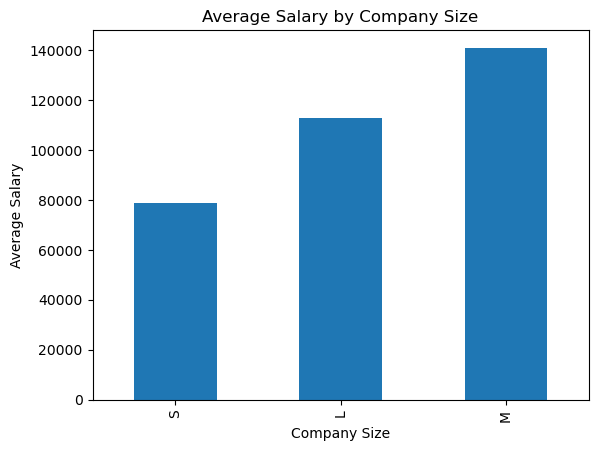

In [79]:
# Visualisation of avrage salary for each company size category
grouped.sort_values().plot(kind='bar')
plt.title('Average Salary by Company Size')
plt.ylabel('Average Salary')
plt.xlabel('Company Size')
plt.show()


In [85]:
# Interpretation of results

small_company_salaries = salaries_df[salaries_df['company_size'] == 'S']['salary_in_usd']
medium_company_salaries = salaries_df[salaries_df['company_size'] == 'M']['salary_in_usd']
large_company_salaries = salaries_df[salaries_df['company_size'] == 'L']['salary_in_usd']
# Add more sizes as needed

# Perform the ANOVA test
f_statistic, p_value = f_oneway(small_company_salaries, medium_company_salaries, large_company_salaries)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


F-statistic: 97.86363302160417
P-value: 6.699571678195113e-42


In [122]:
# How does salary by company size change over time
grouped = salaries_df.groupby(['company_size', 'work_year'])['salary_in_usd'].mean()
print(grouped)

company_size  work_year
L             2020         101000.371429
              2021         107165.700787
              2022         121099.526042
              2023          98739.289474
M             2020         112734.866667
              2021          74463.035714
              2022         137083.953999
              2023         150438.695960
S             2020          70958.560000
              2021          82129.446809
              2022          74677.115385
              2023          93339.812500
Name: salary_in_usd, dtype: float64


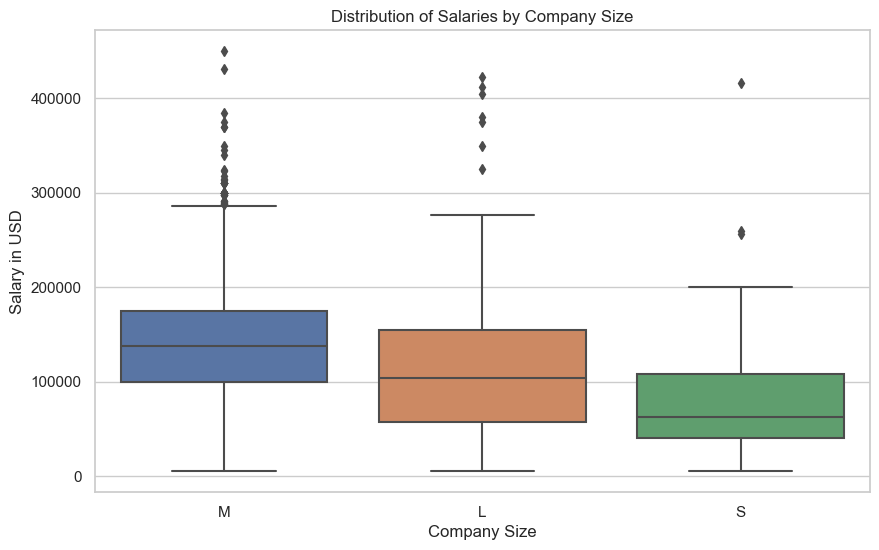

In [115]:
# Plotting the data
# Create a boxplot to show the distribution of salaries within each company size
plt.figure(figsize=(10, 6))
sns.boxplot(x='company_size', y='salary_in_usd', data=salaries_df)

# Add labels to the plot
plt.xlabel('Company Size')
plt.ylabel('Salary')
plt.title('Distribution of Salaries by Company Size')

# Display the plot
plt.show()

In [ ]:
'''This plot provides a visual representation of the range and distribution of salaries for each company size. 
The line in the middle of each box represents the median salary, while the box itself represents the interquartile range (the middle 50% of salaries). 
The whiskers represent the range of the data within 1.5 times the interquartile range, and any points beyond that are considered outliers.'''

In [104]:
# grouping the data by year and company size ,calculate average salary
avg_salary_df = salaries_df.groupby(['work_year', 'company_size'])['salary_in_usd'].mean().reset_index()

# Display the dataframe
print(avg_salary_df.head())

   work_year company_size  salary_in_usd
0       2020            L  101000.371429
1       2020            M  112734.866667
2       2020            S   70958.560000
3       2021            L  107165.700787
4       2021            M   74463.035714


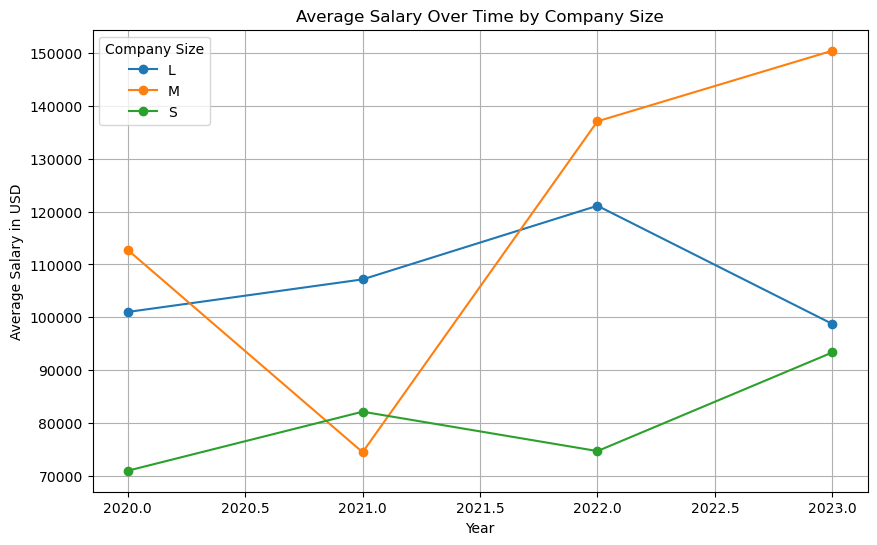

In [105]:
# Plotting the average salary over time by company size
plt.figure(figsize=(10,6))

for size in avg_salary_df['company_size'].unique():
    temp_df = avg_salary_df[avg_salary_df['company_size'] == size]
    plt.plot(temp_df['work_year'], temp_df['salary_in_usd'], marker='o', label=size)

plt.title('Average Salary Over Time by Company Size')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.legend(title='Company Size')
plt.grid(True)
plt.show()

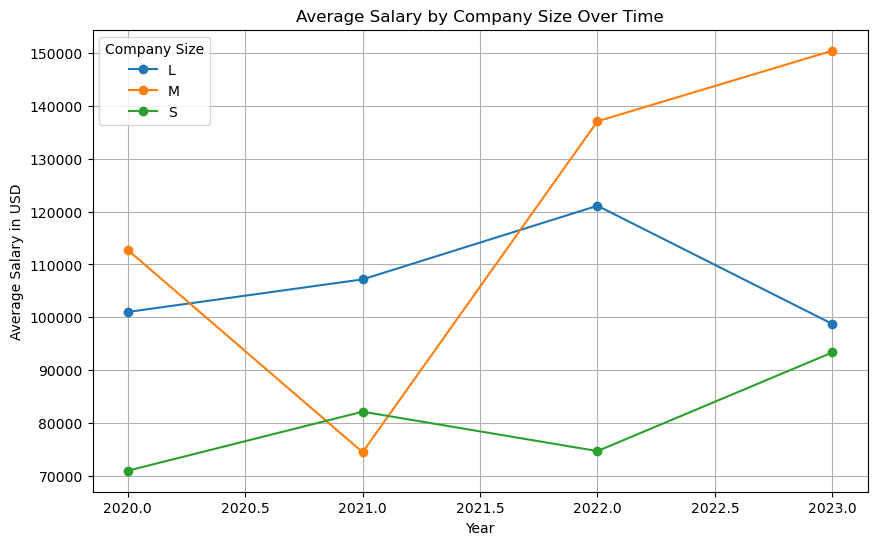

In [96]:
# Grouping the data by 'company_size' and 'work_year'
grouped = salaries_df.groupby(['company_size', 'work_year'])['salary_in_usd'].mean().reset_index()

# Plotting separate lines for each company size
plt.figure(figsize=(10,6))
for size in grouped['company_size'].unique():
    subset = grouped[grouped['company_size'] == size]
    plt.plot(subset['work_year'], subset['salary_in_usd'], marker='o', label=size)

plt.title('Average Salary by Company Size Over Time')
plt.ylabel('Average Salary in USD')
plt.xlabel('Year')
plt.grid(True)
plt.legend(title='Company Size')
plt.show()

In [ ]:
'''As seen in the box plot before, the baggist variation occurs in mid sized companies, no desceneable trend though(flactuates haphazardly).
large companies show a general trend upwards then a drop fromm 22-23,(posit a possible explanation for presentation)
Small companies generally stay constant, jump upwards from 22-23'''

In [124]:
# Performing ANOVA 
f_value, p_value = f_oneway(
    salaries_df['salary_in_usd'][salaries_df['job_title'] == 'Data Analyst'],
    salaries_df['salary_in_usd'][salaries_df['job_title'] == 'Analytics Engineer'],
    salaries_df['salary_in_usd'][salaries_df['job_title'] == 'Data Engineer']
)

f_value, p_value


(65.06401178259976, 9.79735664733475e-28)

In [ ]:
# f-value >2.5 and p-value <0.05 so the findings are statistically relevent 